# Project Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Command to tell Python to actually display the graphs
%matplotlib inline
# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
path="/content/drive/MyDrive/Python Course/foodhub_order.csv" 
df=pd.read_csv(path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.duplicated().sum()


0

#### Observations:

1.The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

2.There values in wrong format in the 'rating' columns 

In [ ]:
#checking the number of rows and columns
print('DataFrame contains',df.shape[0], 'rows and ',df.shape[1],'columns')

DataFrame contains 1898 rows and  9 columns


#### Observations:
The DataFrame has 1,898 rows and 9 columns



In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. We have 5 numerical columns and 4 object columns


In [ ]:
# Checkin if there are missing values in the DataFrame
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
1. There are no missing values in the data


In [ ]:
# Checking the statistical summary of the data, "include='all'" will bring in also categorical columns and ".T" willchange colums to rows and rows to columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
1.The average cost of an order is 16.5. 75% of orders cost 22.3 or less. The most expensive order is 35.4 and the cheapest is 4.5. the average is great than the median which mean the distribution slightly left skewed 

2.American Cuisine is the most popular cuisine and Shake Shack is the restaurant with high number of orders

3.Most orders are made during the weekend and 736 orders(around 36% of orders) are not rated

4.The average time of preparing the food is around 27 minutes .75% of food takes 31 minutes or less to get ready.35 minutes is maximun time it takes to prepare the food and 21 minutes is the minimum time.

5.On average it takes around 24 minutes to deliver the food to the client.The longest time to deliver is 33 mimutes and the shortest is 15 minutes.
The distribution is slightly left skewed

6.No skewness or symmetric distribution given the median and mean are almost equal



In [ ]:
# The code will give us a new DataFrame where the column rating has value 'Not given' 
# then shape[0] function will give us the number of rows of the new DataFrame
print(df.loc[df['rating']=='Not given'].shape[0],'orders are not rated')


736 orders are not rated


In [ ]:
# Checking the portion of orders that are not rated vis a vis the total number of orders
df['rating'].value_counts(1)

Not given   0.39
5           0.31
4           0.20
3           0.10
Name: rating, dtype: float64

#### Observations:
1. 736 orders which represent 39% of total orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

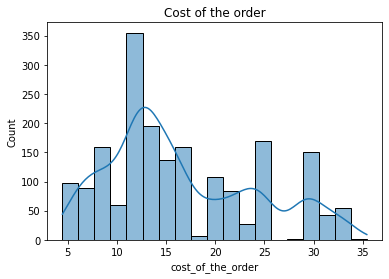

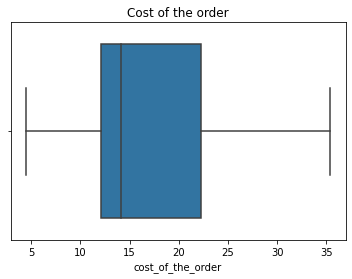

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.title('Cost of the order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.title('Cost of the order')
plt.show()



Observation:

1.The distribution is slightly left skewed 

2.75% of orders cost 23 or less

3.There are no outliers

4.The cheapest order cost 5 and the expensive one 35

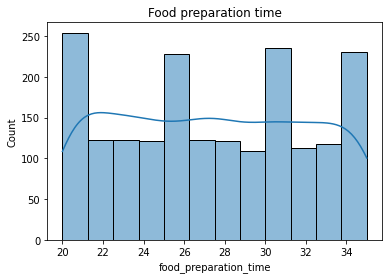

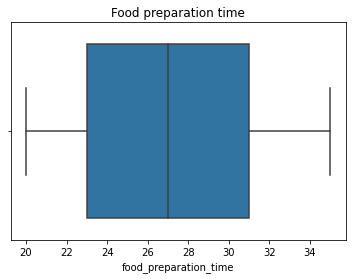

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='food_preparation_time',kde=True)
plt.title('Food preparation time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.title('Food preparation time')
plt.show()

Observation:

1. 75% of food are prepared in between 20 and 31 minutes

2. There are no outliers

3. There is zero skewness or symmetric distribution 

4. The meal that takes the longest to prepare takes 35 minutes

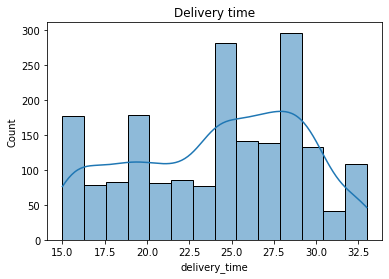

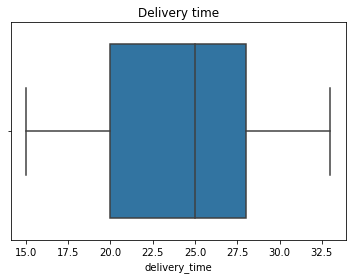

In [ ]:
# Displaying histogram and boxplot
sns.histplot(data=df,x='delivery_time',kde=True)
plt.title('Delivery time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.title('Delivery time')
plt.show()

Observation:

1.The distribution is slightly left skewed

2.75% of orders are delivered in less than 28 minutes

3.There are no outliers

4.The quikest time it takes to delivery food is 15 minutes

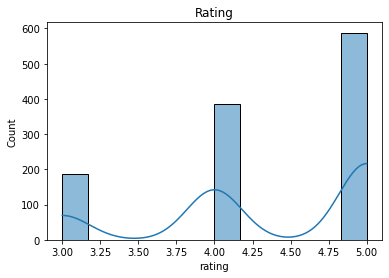

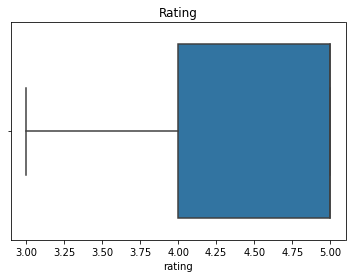

In [ ]:
# replacing 'Not given' with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)
# changing the data type to float
df['rating'] = df['rating'].astype(float)
# Displaying histogram and boxplot
sns.histplot(data=df,x='rating',kde=True)
plt.title('Rating')
plt.show()
sns.boxplot(data=df,x='rating')
plt.title('Rating')
plt.show()


Observation:

1.Rating is randomly distributed

2.75% of rating given by customers is between 4 and 5

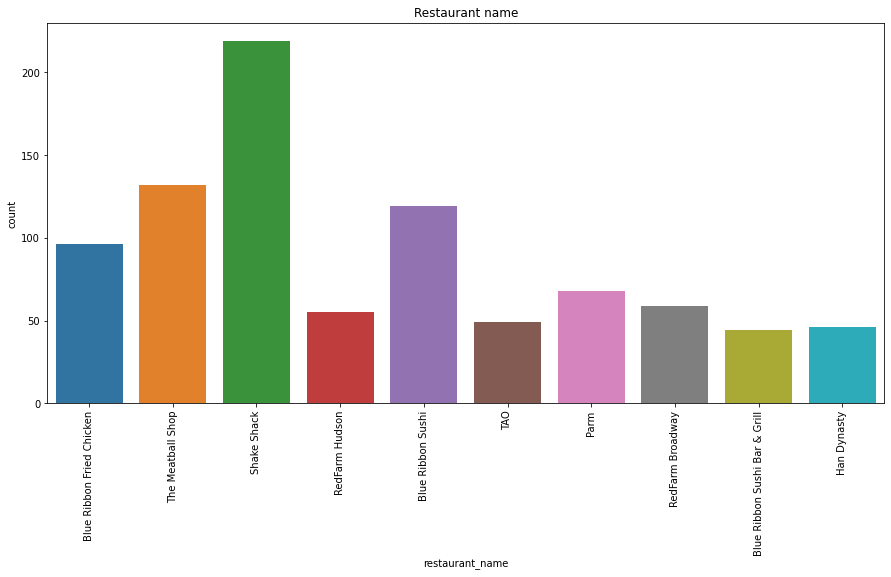

In [ ]:
# We identify the 10 top restaurants in terms of received orders
df['restaurant_name'].value_counts().head(10)
# Creates a new list containing our top 10 restaurant
top_10_restaurants=['Shake Shack','The Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken','Parm','RedFarm Broadway','RedFarm Hudson','TAO','Han Dynasty','Blue Ribbon Sushi Bar & Grill']
# We create a new DataFrame with the 10 top restaurants
df_10_top_restaurants=df.loc[df['restaurant_name'].isin(top_10_restaurants)]
# Displaying countplot
plt.figure(figsize=(15,7))
sns.countplot(data=df_10_top_restaurants,x='restaurant_name')
plt.title('Restaurant name')
plt.xticks(rotation=90)
plt.show()

Observation:

1.Shake Shack is the restaurant with the most orders,followed by the Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken 

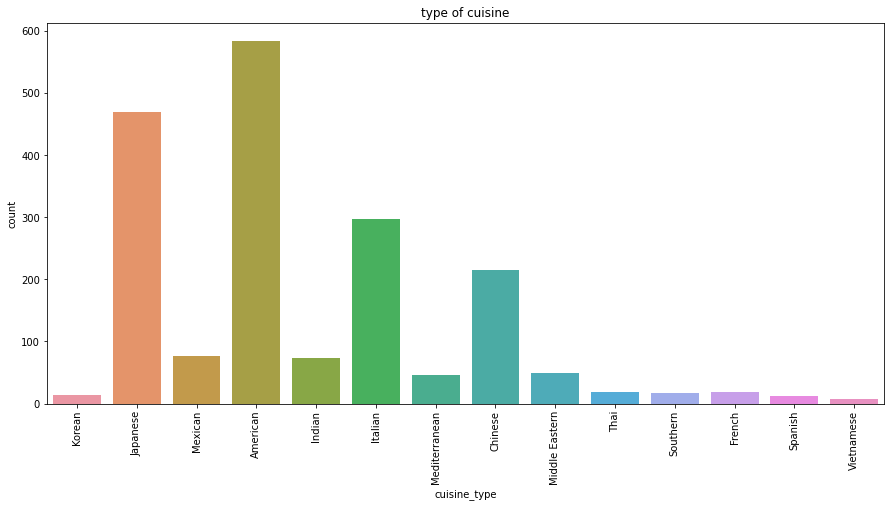

In [ ]:
# Displaying barplot
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.title('type of cuisine')
plt.show()

Observation:

1.American cuisine is the most polular cuisine with 31% of orders,folowed by Japanese cuisine with 25%,Italian cuisine with 16% and Chinese cuisine with 11%



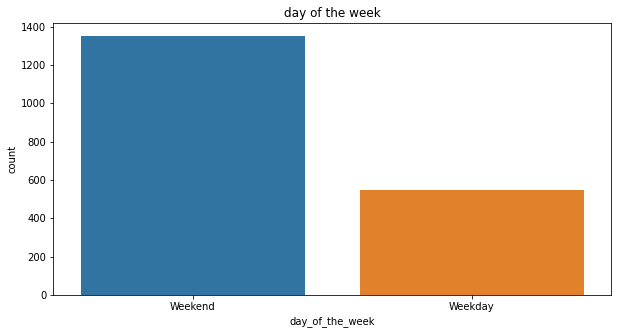

In [ ]:
# Displaying barplot
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='day_of_the_week')
plt.title('day of the week')
plt.show()

Observation:

* 71% of orders are made during the weekend and 29% in the weekdays

In [ ]:
# the code gives number of unique values in a column which gives in our case the number of received orders
print('FoodHub reveieved',df['order_id'].nunique(),'orders')

FoodHub reveieved 1898 orders


Observation:

FoodHub received 1898 orders 

In [ ]:
# the code gives number unique values in a column which gives in our case the number of registered users in FoodHub application
print('FoodHub has',df['customer_id'].nunique(),'customers')

FoodHub has 1200 customers


Observation:

FoodHub has 1,200 registered customers or users



In [ ]:
# the code gives number unique values in a column which gives in our case the number of restaurants
print('FoodHub has',df['restaurant_name'].nunique(),'restaurants in their application')

FoodHub has 178 restaurants in their application


Obseravtion:

 There are 178 restaurants in FoodHub application

In [ ]:
# the code gives number unique values in a column which gives in our case the number of type of cuisines
print('There are',df['cuisine_type'].nunique(),'Types of cuisine in FoodHub application')

There are 14 Types of cuisine in FoodHub application


Observation:

FoodHub has 14 types of cuisines

In [ ]:
# The code will count the number of time a particular value is repeated in the column 'restaurant_name'
df['restaurant_name'].value_counts().head()


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observation:
The top 5 restaurants in terms of received orders are:

   The first is Shake Shack  with 219 orders

  The second is The Meatball Shop with 132 orders

  The third is Blue Ribbon Sushi with 119 orders

  The fourth is Blue Ribbon Chicken with 96 orders

  The fifth is Parm with 68 orders




In [ ]:
# The code will create a new DataFrame where the column 'day_of_the_week' has value 'Weekend' then look into column 'cuisine type' to check how many times values are repeated
df.loc[df['day_of_the_week']=='Weekend','cuisine_type'].value_counts().head(1)


American    415
Name: cuisine_type, dtype: int64

#### Observations:
1. The American Cuisine is ordered 415 times during the weekends which is the highest ,hence the most popular cuisine on weekends


In [ ]:
# We first count the number of orders that cost more than 20 dollars
df.loc[df['cost_of_the_order']>20].shape[0]
# Then we do simple calculation , number of orders that cost more than 20 dollars divided by the total number of orders then multiply by 100 and round the result so that there is no fractional part after the decimal point
print('The percentage of orders that cost more than 20 dollars is:',round(((df.loc[df['cost_of_the_order']>20].shape[0])/df.shape[0]*100),))

The percentage of orders that cost more than 20 dollars is: 29


#### Observations:
1. Around 29% of orders cost more than 20 dollars


In [ ]:
# The code will calculate the mean of values in the column "delivery_time" and round the result so that there is no fractional part after the decimal point
print('Mean order delivery time is:',round(df['delivery_time'].mean(),))

Mean order delivery time is: 24


#### Observations:
1. Average delivery time is 24 minutes


In [ ]:
# The code will count the number of time a particular value is repeated in the column 'customer_id'
print('ID of the most frequent costumers ',"\n",df['customer_id'].value_counts().head())

ID of the most frequent costumers  
 52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64


#### Observations:
1. The customer with ID 52832 ordered 13 times
2. The customer with ID 47440 ordered 10 times
3. The customer with ID 83287 ordered 9 times
4. The customer with ID 250494 ordered 8 times
4. The customer with ID 259341 ordered 7 times


### Multivariate Analysis

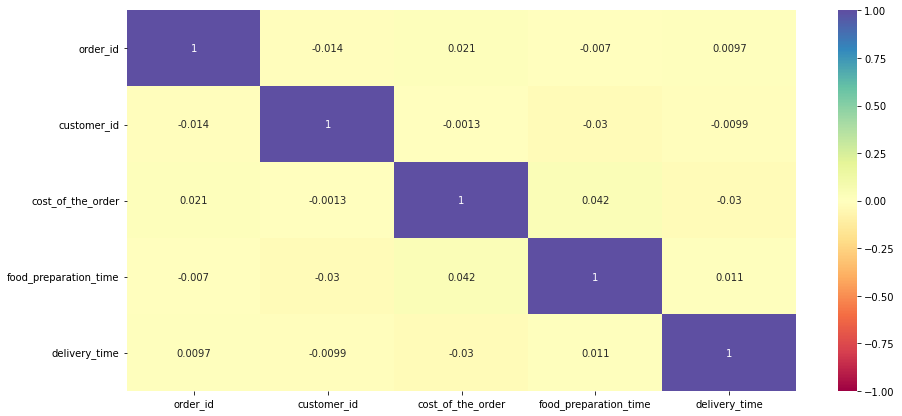

In [ ]:
# Heatmap to check the correlation between numerical data
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()



Observation:

There is no relationship between numerical variables

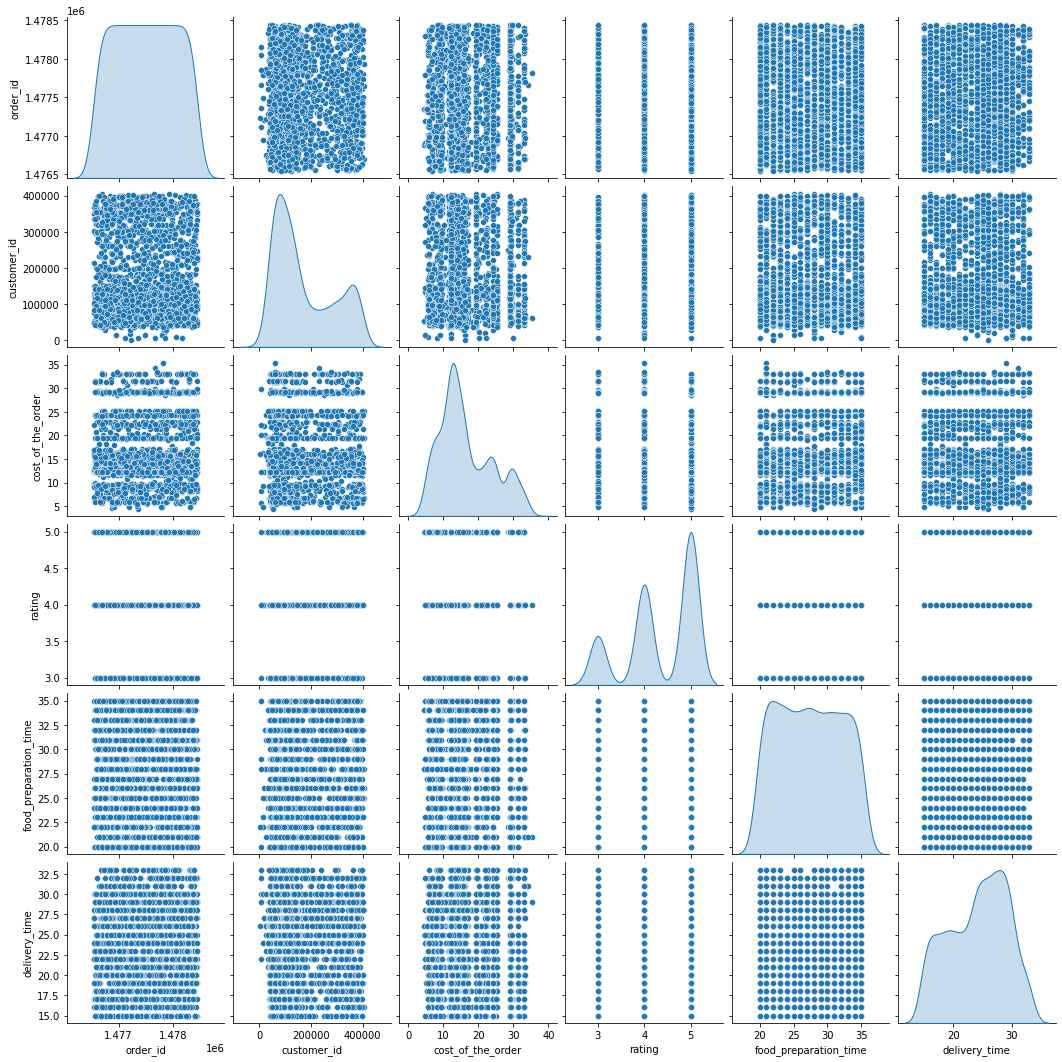

In [ ]:
# Displaying pair plot (which is usual done on numercial variables)
sns.pairplot(data=df,diag_kind="kde")
plt.show()

Observation:

There seem to be no correlation as observed in the heatmap plot

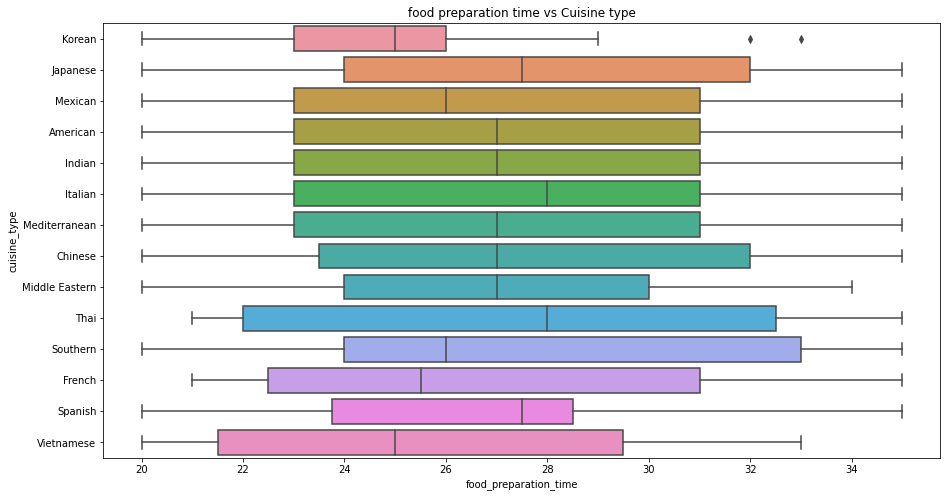

In [ ]:
# Displaying boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='food_preparation_time',y='cuisine_type')
plt.title('food preparation time vs Cuisine type');

Observation:

1. The Mediam food preparation time for all type of cuisine is more than 24 minutes which means 50% orders takes more that 24 minutes to be prepared.

2. There are some outliers on Korean foods, it is possible that some Korean foods take a lot of time to be prepared.


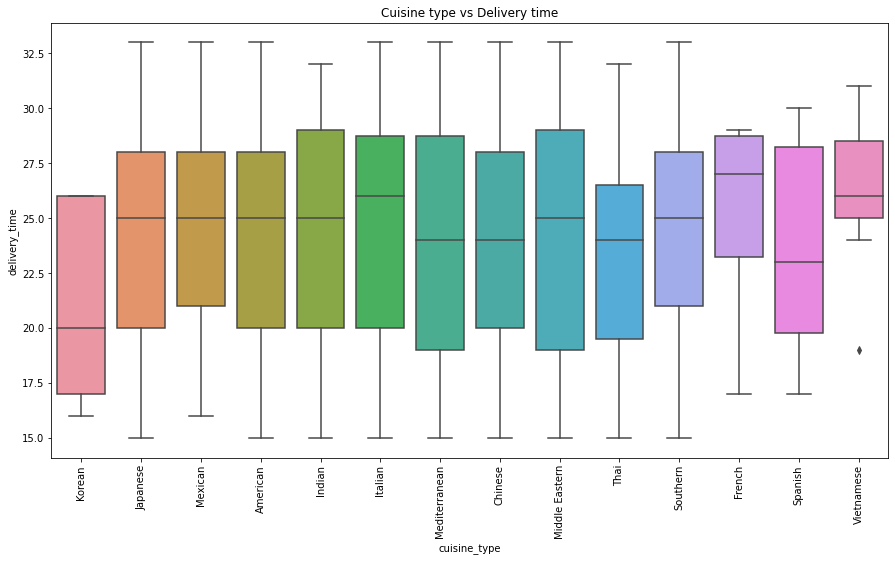

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='cuisine_type',y='delivery_time')
plt.xticks(rotation=90)
plt.title('Cuisine type vs Delivery time');

Observation:

1. It can be observed that 50% of Korean food are delivered in 20 minutes and less which is the best record

2. Ther are some outliers on Vietnamese cuisine



In [ ]:
# Average rate per type of cuisine
df_rating_per_cuisine=df.groupby(['cuisine_type'])['rating'].mean().sort_values(ascending=False).reset_index()
df_rating_per_cuisine

,cuisine_type,rating
0,Spanish,4.83
1,Thai,4.67
2,Indian,4.54
3,Mexican,4.42
4,Japanese,4.37
5,Italian,4.36
6,Chinese,4.34
7,Southern,4.31
8,French,4.30
9,American,4.30


Observation:

On average Spanish is the top rated cuisine

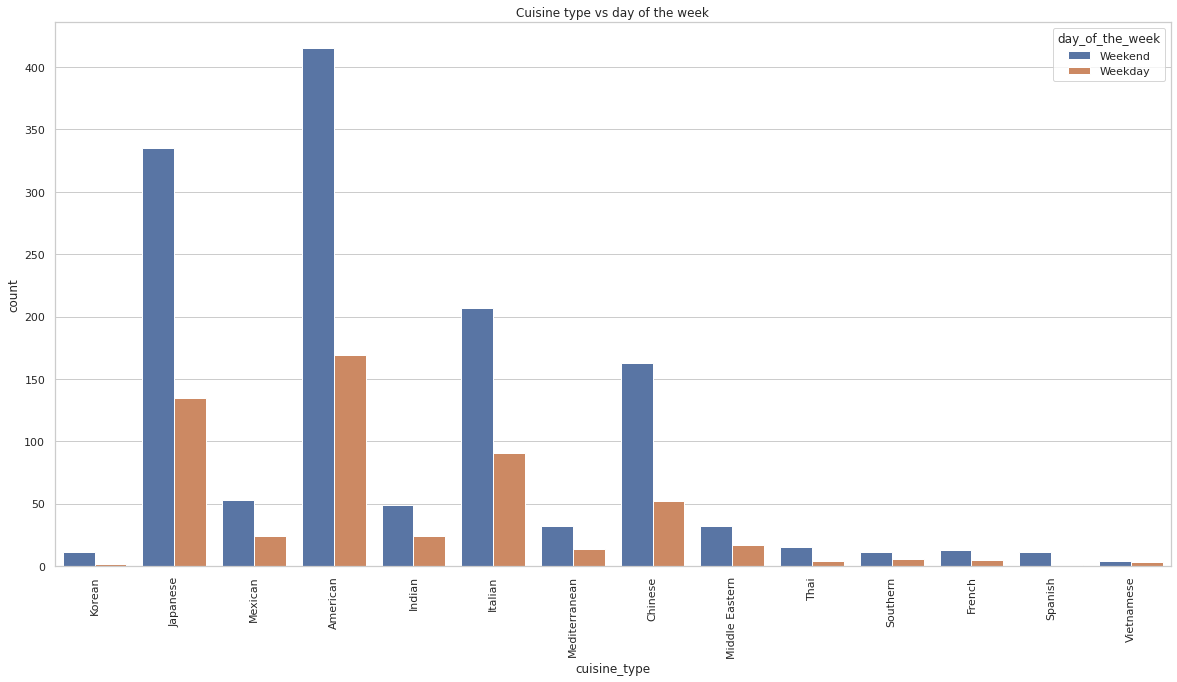

In [ ]:
# Diplaying count plot
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week',dodge=True)
plt.xticks(rotation=90)
plt.title('Cuisine type vs day of the week')
plt.show()



Observation:

1. Most orders are made during the weekend for all types of cuisine 

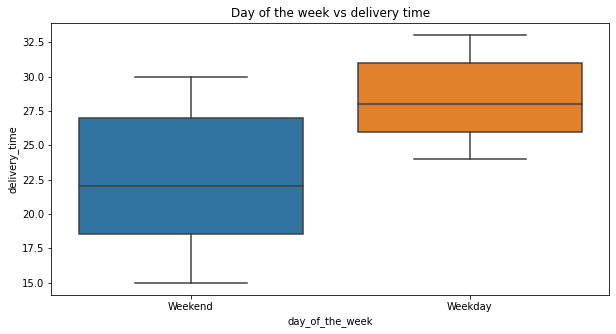

In [ ]:
# Displaying box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.title('Day of the week vs delivery time');

Observation:

 75% of food are delivered in less than 27 minutes on weekends wheras 75% of food are delivered in more than 26 minutes on weekdays.This means it takes more time to deliver food on weekdays

In [ ]:
# The top 5 revenue generated restaurants
df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending = False).head().reset_index()

,restaurant_name,cost_of_the_order
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76


Observatio:

Shake Shak is the restaurant with the highest revenue followed by The meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

In [ ]:
# The code creates a new DataFrame with American as type of cuisine ,then checks the number of unique values in restaurant name column.
df_American_food=df.loc[df['cuisine_type']=='American']
print('American foods is served in',df_American_food['restaurant_name'].nunique(), 'different restaurants')

# The code creates a new DataFrame with Italian as type of cuisine ,then checks the number of unique values in restaurant name column.
df_Italian_food=df.loc[df['cuisine_type']=='Italian']
print('Italian foods is served in',df_Italian_food['restaurant_name'].nunique(), 'different restaurants')

# The code creates a new DataFrame with Japanese as type of cuisine ,then checks the number of unique values in restaurant name column.
df_Japanese_food=df.loc[df['cuisine_type']=='Japanese']
print('Japanese foods is served in',df_Japanese_food['restaurant_name'].nunique(), 'different restaurants')

# The code creates a new DataFrame with Chinese as type of cuisine ,then checks the number of unique values in restaurant name column.
df_Chinese_food=df.loc[df['cuisine_type']=='Chinese']
print('Chinese foods is served in',df_Chinese_food['restaurant_name'].nunique(), 'different restaurants')


# The code creates a new DataFrame with Mexican as type of cuisine ,then checks the number of unique values in restaurant name column.
df_Mexican_food=df.loc[df['cuisine_type']=='Mexican']
print('Mexican foods is served in',df_Mexican_food['restaurant_name'].nunique(), 'different restaurants')


American foods is served in 41 different restaurants
Italian foods is served in 31 different restaurants
Japanese foods is served in 29 different restaurants
Chinese foods is served in 16 different restaurants
Mexican foods is served in 11 different restaurants


Observation:

1. American food are served in 41 different restaurant, Italian food in 31 restaurants,Japanese food in 29 restaurants ,Chinese food in 16 restaurants and Mexican food in 11 restaurants

In [ ]:
# Check the restaurants which have rating count more than 50
df_count= df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
# create a new DataFrame with the names of restaurants having 50 rating count
df_50_count_and_more=df.loc[df['restaurant_name'].isin(['Shake Shack','The Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken'])]
# Group restaurants and find average rating 
df_50_count_and_more.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()



,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


#### Observations:

Shake Shack ,The Meatball Shop, Blue Ribbon Suchi and Blue Ribbon Fried Chicken restaurants are the ones qualified for a promotional offer in the advertisement  


In [ ]:
# The code will iterate in column cost of the order and if a condition is fullfiled, it will apply the appropriate pecrentage and put everything in a new column called 'FoodHub Charge',then we sum all values in the new colum 'FoodHub Charge'
def charges(value):
    if (value['cost_of_the_order'] >5) & (value['cost_of_the_order']<=20) :
        return value["cost_of_the_order"] * 0.15
    else:
        return value['cost_of_the_order'] * 0.25
df['FoodHub_Charges'] = df.apply(charges,axis=1)
print('The net revenue generated across all orders is:',round(df['FoodHub_Charges'].sum(),))



The net revenue generated across all orders is: 6177


#### Observations:

Net revenue generated by the company across all orders is 6,177


In [ ]:
# creating a new column 'total_time_to_deliver' which is a combination of food_preparation_time and delivery_time
df['total_time_to_deliver']=df['delivery_time']+df['food_preparation_time']
# Creating a new DataFrame where values in column 'total_time_to_deliver' are greater than 60 and then calculate the percentage
print('The percentage of orders that take more than 60 minutes to get delivered is: ',round((df[df['total_time_to_deliver']>60].shape[0])/df.shape[0]*100,))


The percentage of orders that take more than 60 minutes to get delivered is:  11


#### Observations:

Around 11% of orders take more than 60 minutes to be delivered to the client




In [ ]:
# The codes will create new DataFrames containing only weekend and weekday respectively
weekend=df[df['day_of_the_week']=='Weekend']
weekdays=df[df['day_of_the_week']=='Weekday']
# Then we calculate the average deivery time for each new DataFrame
print('Average delivery time on weekend is: ',round(weekend['delivery_time'].mean(),))
print('Average delivery time on weekdays is: ',round(weekdays['delivery_time'].mean(),))
# Average delivery time difference 
print('There are',round(weekdays['delivery_time'].mean(),)-round(weekend['delivery_time'].mean(),),'minutes average delivery time difference')

Average delivery time on weekend is:  22
Average delivery time on weekdays is:  28
There are 6 minutes average delivery time difference


#### Observations:

It takes 6 minutes longer to deliver food during the weekdays compared to the weekend


### Conclusion and Recommendations

### Conclusions:

* The average cost of an order is 16.5 and 75% of orders cost 22.3 or less. The most expensive order is 35.4 and the cheapest is 4.5. 

* The average time of preparing the food is around 27 minutes .75% of food takes 31 minutes or less to get ready.35 minutes is maximun time it takes to prepare the food and 21 minutes is the minimum time.

* In average it takes around 24 minutes to deliver food to the client.The longest time to deliver is 33 mimutes and the shortest is 15 minutes

* 75% of orders cost 23 or less

* The cheapest order cost 5 and the expensive one 35

* 75% of food are prepared in between 20 and 31 minutes

* The meal that takes the longest to prepare takes 35 minutes

* 75% of rating given by customers is between 4 and 5

* Shake Shack is the restaurant with the most orders with around 7% of orders followed by the Meatball Shop with around 4%, Blue Ribbon Sushi with around    3.8% and Blue Ribbon Fried Chicken with around 3.3%

* American cuisine is the most polular cuisine with around 19% of orders,folowed by Japanese cuisine with 14%,Italian cuisine with 9% and Chinese cuisine with 7%

* 70% of orders are made during the weekend and 30% in the weekdays

* FoodHub received 1898 orders 

* FoodHub got orders from 1,200 registered customers

* FoodHub works with 178 restaurants

* FoodHub have 14 types of cuisines

* Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Chicke,Parm are the top 5 restaurants in terms of received orders 

* The American Cuisine is the most popular cuisine on weekends

* 736 orders which represent 39% of total orders are not rated

* Around 29% of orders cost more than 20 dollars

* The Average delivery time is 24 minutes

* 50% of orders takes more than 24 minutes to be prepared

* Some Korean foods take a lot of time to be prepared.

* 50% of Korean food are delivered in 20 minutes and less which is the best record

* Net revenue generated by the company across all orders is 6,177

* Most of orders are made during the weekend for all types of cuisine

* On average Spanish is the top rated cuisine

* Shake Shak is the restaurant with the highest revenue followed by The meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

* around 11% of orders take more than 60 minutes to be delivered to the client

* It takes 6 minutes longer to deliver food during weekdays compared to weekend


### Recommendations:

*  FoodHub should increase the visibility of the American,Japan,Italian ,Mexican and Chinese cuisines given they are the most popular and also serve quickly people who order those cuisines. it should also onboard more restaurants which serve those cuisines to increase sales.

* FoodHub must deploy enaugh staff during the weekends to delivery a higher number of odrers

* FoodHub must find a way of reducing delivery time during weekdays


* FoodHub should increase the visibility of Shake Shack,The Meatball Shop,Blue Ribbon Sushi,Blue Ribbon Chicke,Parm as they are the top restaurants in terms of  orders and also increase staffs affected to those restaurants in order to serve quickly costomers

* FoodHub should also focus on Spanish, Thai,Indian,Mexican and Japanese cuisines as they are the top rated

* FoodHub should find a way of making sure all customers rate the service

	




---